In [1]:
from local_tree_decomp import *
from help_functions import *

from local_hom_count_best import *
from local_hom_count_best_parallel import *


In [2]:
def get_colours(n, k):
    return [i for i in range(k) for _ in range(n)]

In [3]:
graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

square = graphs.Grid2dGraph(2, 2)
square.relabel()
square_clr = [0, 1, 1, 0]

three_grid = graphs.Grid2dGraph(3, 3)
three_grid.relabel()
three_grid_clr = get_colours(3, 3)

four_grid = graphs.Grid2dGraph(4, 4)
four_grid.relabel()
four_grid_clr = get_colours(4, 4)

target_graph = graphs.PathGraph(4)
target_clr = [0, 1, 2, 3]

counter = GraphHomomorphismCounter(graph, square)
count = counter.count_homomorphisms_best()
print(count)

# colour_counter = GraphHomomorphismCounter(square, three_grid, 2, square_clr, three_grid_clr, colourful=True)
# colourful_count = colour_counter.count_homomorphisms_best()
# print(colourful_count)

par_counter = ParallelGraphHomomorphismCounter(graph, square)
par_count = par_counter.count_homomorphisms_parallel()
print(par_count)

16
Finsh submitting
{(6, {}): <Future at 0x1626e5910 state=finished raised TypeError>, (5, {2}): <Future at 0x16223b190 state=finished raised TypeError>, (4, {0, 2}): <Future at 0x16220d290 state=finished raised TypeError>, (3, {0}): <Future at 0x162718690 state=finished raised TypeError>, (2, {0, 1}): <Future at 0x1621f4710 state=finished raised TypeError>, (1, {0}): <Future at 0x16223bf50 state=finished raised TypeError>, (0, {}): <Future at 0x162719590 state=finished raised TypeError>}
(0, {}) <Future at 0x162719590 state=finished raised TypeError>


TypeError: cannot pickle '_thread.RLock' object

In [4]:
print(counter.DP_table)

[{}, {}, {}, {}, {}, {}, {}]


In [5]:
counter.dir_labelled_TD.vertices()

[(0, {}), (1, {0}), (2, {0, 1}), (3, {0}), (4, {0, 2}), (5, {2}), (6, {})]

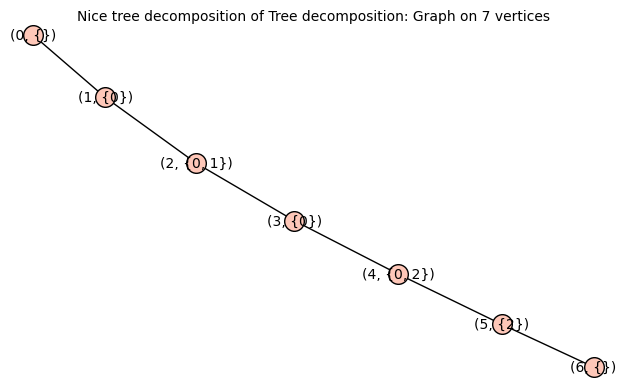

In [5]:
counter.nice_tree_decomp

In [27]:
import random

for i in range(1, 41):
    N = i * 10
    H = graphs.RandomGNP(N, 0.5, seed=42)
    H_color = [random.randint(0, 2) for _ in range(N)]
    print('N: ', N)
    best_speed_test(three_grid, H, three_grid_clr, H_color)
    print()


N:  10
Mono result: 332668
Colourful result: 0

Mono time:
256 ms ± 39.2 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Colourful time:
125 ms ± 6.4 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)

N:  20
Mono result: 70146644
Colourful result: 148

Mono time:
2.58 s ± 55.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Colourful time:
1.12 s ± 56.7 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

N:  30
Mono result: 3086410610
Colourful result: 26342

Mono time:
11.8 s ± 410 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
Colourful time:
6.99 s ± 563 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)

N:  40


KeyboardInterrupt: 

In [84]:
 get_colours(2, 3)

[0, 0, 1, 1, 2, 2]

In [13]:
def best_speed_test(graph, target_graph, graph_clr, target_clr):
    # best_result = count_homomorphisms_best(graph, target_graph)
    # best_colour_result = count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

    counter = GraphHomomorphismCounter(graph, target_graph, 0)
    colorful_counter = GraphHomomorphismCounter(graph, target_graph, 0, graph_clr, target_clr, colourful=True)

    print("Mono result:", counter.count_homomorphisms_best())
    print("Colourful result:", colorful_counter.count_homomorphisms_best())

    print('\nMono time:')
    %timeit -r 3 counter.count_homomorphisms_best()

    print('Colourful time:')
    %timeit -r 3 colorful_counter.count_homomorphisms_best()


In [90]:
# graph = graphs.CompleteBipartiteGraph(1, 2)
# random_graph = graphs.RandomGNP(20, 0.6, seed=42)

# counter = GraphHomomorphismCounter(graph, random_graph)
# count = counter.count_homomorphisms_best()
# print(count)

complete = graphs.CompleteGraph(9)
complete_clr = get_colours(3, 3)

counter = GraphHomomorphismCounter(three_grid, complete, 0, three_grid_clr, complete_clr, colourful=True)
print(counter.count_homomorphisms_best())

# %prun counter.count_homomorphisms_best()

1728
 

         132572 function calls in 0.201 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       17    0.064    0.004    0.173    0.010 local_hom_count_best.py:139(_add_intro_node_best)
    54062    0.028    0.000    0.030    0.000 generic_graph.py:11306(vertex_iterator)
    10539    0.024    0.000    0.060    0.000 help_functions.py:59(is_valid_mapping)
    25335    0.017    0.000    0.017    0.000 help_functions.py:67(<genexpr>)
        9    0.014    0.002    0.024    0.003 local_hom_count_best.py:229(_add_forget_node_best)
    10539    0.013    0.000    0.029    0.000 {built-in method builtins.all}
     3513    0.007    0.000    0.010    0.000 local_hom_count_best.py:200(<listcomp>)
     5386    0.006    0.000    0.006    0.000 help_functions.py:91(add_vertex_into_mapping)
    10577    0.006    0.000    0.006    0.000 {built-in method builtins.isinstance}
        2    0.003    0.002    0.003    0.002 local_hom_count_best.p

In [ ]:
%load_ext line_profiler

from local_hom_count_best import count_homomorphisms_best

%lprun -f count_homomorphisms_best(graph, target_graph)

In [4]:
g = graph

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

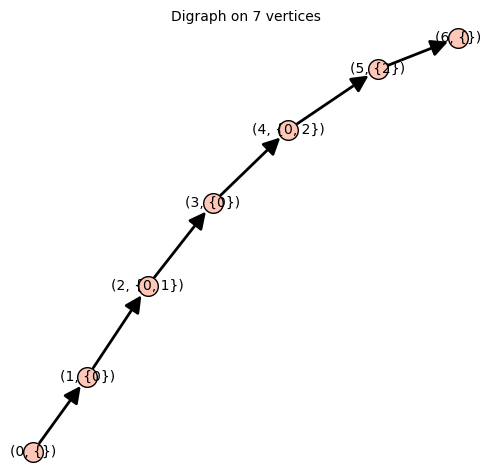

In [7]:
dir_labelled_TD

In [6]:
node_changes(dir_labelled_TD)

{0: 0, 1: 1, 2: 1, 3: 2, 4: 0, 5: 2}

In [4]:
# colour_counter = GraphHomomorphismCounter(graph, target_graph, 2, graph_clr, target_clr, colourful=True)
# colourful_count = colour_counter.count_homomorphisms_best()
# print(colourful_count)

import random
random.seed(int(42))

graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

# target_graph = graphs.CompleteGraph(3)
# target_clr = [0, 1, 2]

for i in range(1, 21):
    N = i * 5
    random_graph = graphs.RandomGNP(N, 0.5, seed=42)
    random_clr = [random.randint(0, 1) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, random_graph, graph_clr, random_clr)
    print()

N:  5
Best result:
884 µs ± 94.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Best colour result:
958 µs ± 84.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  10
Best result:
1.65 ms ± 159 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Best colour result:
1.04 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  15
Best result:
2.52 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
902 µs ± 43.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  20
Best result:
3.92 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
880 µs ± 34 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  25
Best result:
5.64 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
965 µs ± 56.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

N:  30
Best result:
9.02 ms ± 1.02 ms per loop (mean ± std. dev. of 7

KeyboardInterrupt: 

In [ ]:
import random

graph = graphs.CompleteBipartiteGraph(1, 3)
graph_clr = [0, 1, 1, 1]

target_graph = graphs.PetersenGraph()

max_num = 0

for _ in range(500):
    random_clr = [random.randint(0, 1) for _ in range(10)]
    num = count_homomorphisms_best(graph, target_graph, graph_clr, random_clr, colourful=True)
    if num > max_num:
        max_num = num

print(max_num)

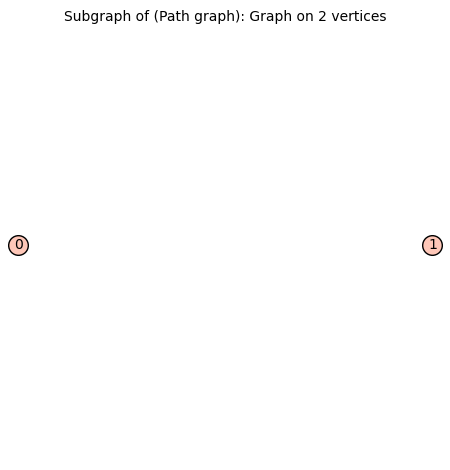

In [8]:
foo = target_graph.subgraph([1, 3])
foo.relabel(); foo

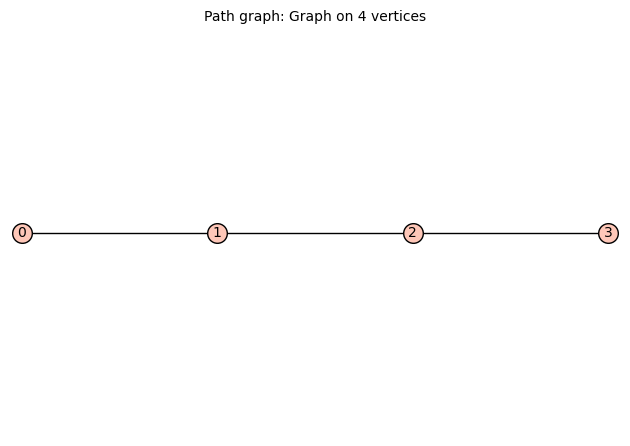

In [4]:
target_graph

In [13]:
graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

random_graph = graphs.RandomGNP(70, 0.5, seed=42)
random_clr = [random.randint(0, 1) for _ in range(N)]

colorful_counter = GraphHomomorphismCounter(graph, random_graph, 2, graph_clr, random_clr, colourful=True)
%mprun colorful_counter.count_homomorphisms_best()

TypeError: 'list' object cannot be interpreted as an integer

In [7]:
[i for i in random.randint(0, 3)]

AttributeError: 'function' object has no attribute 'randint'

In [14]:
foo.density()

2/15

In [91]:
def blow_up_graph(original_graph, blow_up_size):
    """
    Create the blow-up of a given graph.
    
    Parameters:
    - original_graph: The original graph to be blown up.
    - blow_up_size: A dictionary mapping each vertex of the original graph to the size of the independent set replacing it.
    
    Returns:
    - A SageMath graph representing the blow-up of the original graph.
    """
    # Create an empty graph for the blow-up
    blow_up = Graph()
    
    # Step 1: Replace each vertex with an independent set
    vertex_map = {}  # Maps original vertex to the list of new vertices in the independent set
    for v in original_graph.vertices():
        new_vertices = [f'{v}_{i}' for i in range(blow_up_size[v])]
        blow_up.add_vertices(new_vertices)
        vertex_map[v] = new_vertices
    
    # Step 2: Connect the vertices between independent sets
    for u, v in original_graph.edges(labels=False):
        for new_u in vertex_map[u]:
            for new_v in vertex_map[v]:
                blow_up.add_edge(new_u, new_v)
    
    return blow_up


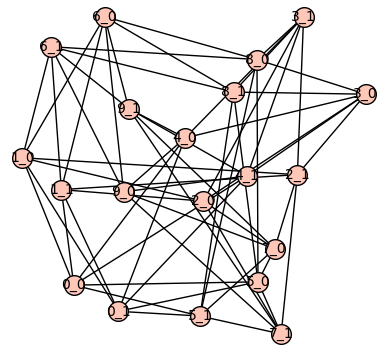

In [92]:
# Define the original graph
G = graphs.PetersenGraph()

# Define the blow-up sizes for each vertex
blow_up_sizes = {v: 2 for v in G.vertices()}  # Replace each vertex with an independent set of size 2

# Create the blow-up graph
blown_up_graph = blow_up_graph(G, blow_up_sizes)

# Show the blown-up graph
blown_up_graph.show()


In [93]:
def blow_up_graph_simple(original_graph, set_size):
    """
    Create the blow-up of a given graph with uniform independent set sizes.
    
    Parameters:
    - original_graph: The original graph to be blown up.
    - set_size: The uniform size of the independent set that replaces each vertex.
    
    Returns:
    - A SageMath graph representing the blow-up of the original graph.
    """
    blow_up = Graph()

    # Create a mapping from original vertices to new independent set vertices
    for v in original_graph.vertices():
        for i in range(set_size):
            blow_up.add_vertex(f'{v}_{i}')

    # Connect vertices in the independent sets according to the original graph's edges
    for u, v in original_graph.edges(labels=False):
        for i in range(set_size):
            for j in range(set_size):
                blow_up.add_edge(f'{u}_{i}', f'{v}_{j}')
                
    return blow_up


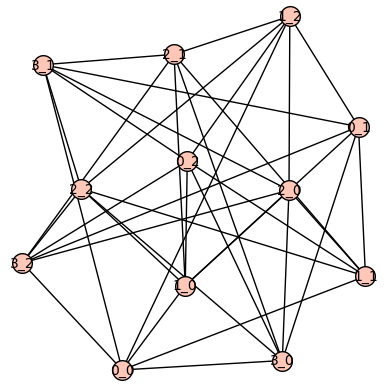

In [95]:
# Define the original graph
G = graphs.CycleGraph(4)  # A simple cycle graph

# Define the uniform size for the independent sets
uniform_set_size = 3  # Replace each vertex with an independent set of size 3

# Create the blow-up graph
blown_up_graph = blow_up_graph_simple(G, uniform_set_size)

# Show the blown-up graph
blown_up_graph.show()


In [9]:
import random

[random.randint(0, 3) for _ in range(10)]

[3, 0, 0, 1, 2, 3, 2, 3, 3, 0]

In [60]:
# %load_ext memory_profiler

import random
from local_hom_count_best import GraphHomomorphismCounter

N = 200
random_graph = graphs.RandomGNP(N, 0.5, seed=42)
random_clr = [random.randint(0, 1) for _ in range(N)]

colour_counter = GraphHomomorphismCounter(square, random_graph, 0, square_clr, random_clr, colourful=True)

colour_counter.count_homomorphisms_best()

6710165

In [61]:
import sys


the_size = sys.getsizeof(colour_counter.DP_table)
print(f"Memory size: {the_size} bytes")

Memory size: 184 bytes


In [62]:
for i in range(len(colour_counter.DP_table)):
    print(zero_density(colour_counter.DP_table[i]))

0.0
0.515
0.874575
0.967236125
0.734775
0.967236125
0.874575
0.515
0.0


In [63]:
flat_zero_density(colour_counter.DP_table)

0.9661881260777492

In [28]:
def zero_density(nums):
    # Count the number of zeros
    zero_count = nums.count(0)
    # Calculate the total number of elements
    total_elements = len(nums)
    # Calculate the density of zeros
    density = zero_count / total_elements if total_elements > 0 else 0
    return density


0.42857142857142855


In [37]:
def flat_zero_density(list_of_lists):
    # Flatten the list of lists into a single list
    flattened_list = [item for sublist in list_of_lists for item in sublist]
    # Count the number of zeros
    zero_count = flattened_list.count(0)
    # Calculate the total number of elements
    total_elements = len(flattened_list)
    # Calculate the density of zeros
    density = zero_count / total_elements if total_elements > 0 else 0
    return density


0.5


In [5]:
import multiprocessing
from multiprocessing import Manager

def update_counts(number, shared_dict):
    """
    Function that each process will run.
    It updates the count of a specific number in the shared dictionary.
    """
    with shared_dict.get_lock():  # Acquire the lock before modifying the shared dictionary
        if number in shared_dict:
            shared_dict[number] += 1
        else:
            shared_dict[number] = 1

def main():
    # List of numbers to process
    numbers = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 4, 4, 4, 5, 5, 6]
    
    # Create a Manager to hold and manage the shared dictionary
    manager = Manager()
    shared_dict = manager.dict()

    # Create a pool of workers to process updates in parallel
    with multiprocessing.Pool(processes=4) as pool:
        # Map the update_counts function to the numbers, passing the shared dictionary
        pool.starmap(update_counts, [(number, shared_dict) for number in numbers])

    # Output the final counts
    print("Final counts:", dict(shared_dict))

if __name__ == "__main__":
    main()


Process SpawnPoolWorker-3:
Traceback (most recent call last):
  File "/private/var/tmp/sage-10.2-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/private/var/tmp/sage-10.2-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/private/var/tmp/sage-10.2-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/private/var/tmp/sage-10.2-current/local/var/lib/sage/venv-python3.11.1/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'update_counts' on <module '__main__' (built-in)>
Process SpawnPoolWorker-4:
Traceback (most recent call last):
  File "/private/var/tmp/sage-10.2-current/local/

KeyboardInterrupt: 